In [1]:
#IMPORT REQUIRED PACKAGE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

LOAD THE DATA FROM 1990 TO TILL DATE

In [2]:
df_1=pd.read_csv("C:/Users/monis/Desktop/guvi project/singapore/ResaleFlatPricesBasedonApprovalDate19901999 (1).csv")

In [3]:
df_2=pd.read_csv("C:/Users/monis/Desktop/guvi project/singapore/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")

In [4]:
df_3=pd.read_csv("C:/Users/monis/Desktop/guvi project/singapore/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")

In [5]:
df_4=pd.read_csv("C:/Users/monis/Desktop/guvi project/singapore/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")

In [6]:
df_5=pd.read_csv("C:/Users/monis/Desktop/guvi project/singapore/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [7]:
#CONCAT ALL DATA INTO DATAFRAME
df = pd.concat([df_1, df_2, df_3, df_4, df_5], axis=0)

DATA CLEANING:
1.DATA TYPE CONVERTION
2.NULL VALUES
3.DUPLICATES
4.OUTLIER

In [8]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
dtype: object

In [9]:
#SPLIT MONTH INTO RESALE_YEAR AND RESALE_MONTH
df[['resale_year', 'resale_month']] =df['month'].str.split('-', expand=True)

#MONTH IS OBJECT DATATYPE, SO SPLIT AND CONVERT TO INT DATA TYPE
df['resale_year'] = pd.to_numeric(df['resale_year'], errors='coerce')
df['resale_month'] = pd.to_numeric(df['resale_month'], errors='coerce')

#DROP MONTH COLUMN WHICH IS NO MORE REQUIRED
df.drop('month', axis = 1, inplace= True)

In [10]:
#SPLIT STOREY_RANGE INTO STOREY_LOWER_BOUND AND STOREY_UPPER_BOUND
df[['storey_lower_bound', 'storey_upper_bound']] = df['storey_range'].str.split(' TO ', expand=True)

#STOREY_RANGE IS OBJECT DATATYPE, SO SPLIT AND CONVERT TO INT DATA TYPE
df['storey_lower_bound'] = pd.to_numeric(df['storey_lower_bound'])
df['storey_upper_bound'] = pd.to_numeric(df['storey_upper_bound'])

#DROP STOREY_RANGE COLUMN WHICH IS NO MORE REQUIRED
df.drop('storey_range', axis = 1, inplace= True)


In [11]:
#CONVERT REMAINING_LEASE WHICH IS IN INTEGER AND OBJECT, YEAR AND MONTH, CONVERTING INTO MONTH
import re
def convert_lease_to_months(lease):
    if isinstance(lease, int) or isinstance(lease, float):
        return lease * 12  # Convert years to months
    elif isinstance(lease, str):
        # Extract years and months from the string
        match = re.match(r'(\d+)\s*years?\s*(\d+)?\s*months?', lease)
        if match:
            years = int(match.group(1))
            months = int(match.group(2) or 0)  # If months is None, default to 0
            return years * 12 + months
        else:
            return None  # Handle invalid formats
    else:
        return None  # Handle other invalid types

#COVERTING INTO MONTHS
df['remaining_lease_in_months'] = df['remaining_lease'].apply(convert_lease_to_months)

In [12]:
#DROP REMAINING_LEASE COLUMN
df.drop(columns=['remaining_lease'], inplace=True)

In [13]:
#BLOCK IS OBJECT DATATYPE, SO SPLIT AND CONVERT TO INT DATA TYPE
df['block'] = pd.to_numeric(df['block'], errors='coerce')

In [14]:
# BLOCK,RESALE_YEAR,RESALE_MONTH,STOREY_UPPER_BOUND,STOREY_LOWER_BOUND,REMAINING_LEASE_IN_MONTH
df.dtypes

town                          object
flat_type                     object
block                        float64
street_name                   object
floor_area_sqm               float64
flat_model                    object
lease_commence_date            int64
resale_price                 float64
resale_year                    int64
resale_month                   int64
storey_lower_bound             int64
storey_upper_bound             int64
remaining_lease_in_months    float64
dtype: object

In [15]:
# CHECK FOR NULL VALUES
df.isnull().sum()

town                              0
flat_type                         0
block                        124272
street_name                       0
floor_area_sqm                    0
flat_model                        0
lease_commence_date               0
resale_price                      0
resale_year                       0
resale_month                      0
storey_lower_bound                0
storey_upper_bound                0
remaining_lease_in_months    723841
dtype: int64

In [16]:
#FILL BLOCK WITH MODE VALUE(MOST REPEATED VALUE)
df['block'] = df['block'].fillna(df['block'].mode()[0])

In [17]:
#DROP REMAINING COLUMN AS IT HAS MORE NULL VALUES
df=df.dropna()

In [18]:
df.isnull().sum()

town                         0
flat_type                    0
block                        0
street_name                  0
floor_area_sqm               0
flat_model                   0
lease_commence_date          0
resale_price                 0
resale_year                  0
resale_month                 0
storey_lower_bound           0
storey_upper_bound           0
remaining_lease_in_months    0
dtype: int64

In [19]:
#CHECK DUPLICATES
df.duplicated().sum()

499

In [20]:
df=df.drop_duplicates()

In [21]:
df.duplicated().sum()

0

In [22]:
df['town'].value_counts()

town
SENGKANG           16260
WOODLANDS          14350
JURONG WEST        13818
PUNGGOL            13719
TAMPINES           13704
YISHUN             13489
BEDOK              11229
HOUGANG            10252
CHOA CHU KANG       9320
ANG MO KIO          8686
BUKIT BATOK         7751
BUKIT MERAH         7692
BUKIT PANJANG       7464
TOA PAYOH           6255
KALLANG/WHAMPOA     6097
PASIR RIS           6076
SEMBAWANG           5570
QUEENSTOWN          5555
GEYLANG             5064
CLEMENTI            4651
JURONG EAST         4236
SERANGOON           3880
BISHAN              3648
CENTRAL AREA        1735
MARINE PARADE       1249
BUKIT TIMAH          502
Name: count, dtype: int64

In [23]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['block', 'floor_area_sqm', 'resale_price', 'remaining_lease_in_months']

In [24]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['lease_commence_date',
 'resale_year',
 'resale_month',
 'storey_lower_bound',
 'storey_upper_bound']

<function matplotlib.pyplot.show(close=None, block=None)>

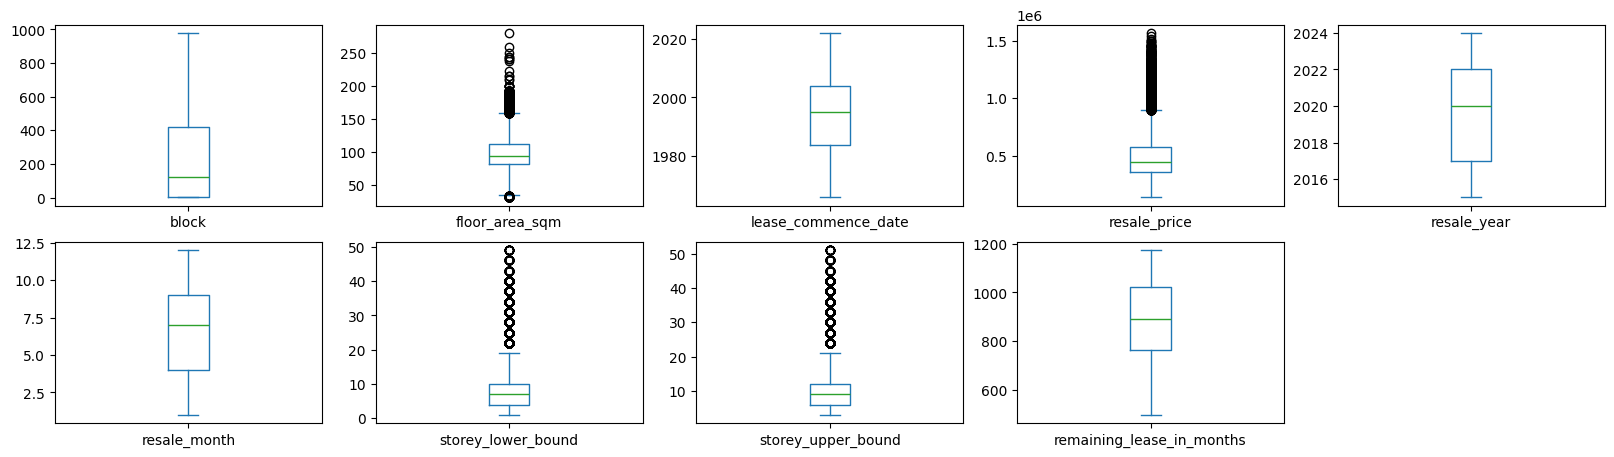

In [25]:
df.plot(kind='box',subplots=True,layout=(3,5),figsize=(20,8))
plt.show

In [26]:
def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    outliers_below = df[df[column] < lower_threshold].shape[0]
    outliers_above = df[df[column] > upper_threshold].shape[0]
    df[column] = df[column].clip(lower_threshold, upper_threshold)
    print(column,outliers_above,outliers_below)

In [27]:
outlier(df,'block')
outlier(df,'floor_area_sqm')
outlier(df,'resale_price')
outlier(df,'remaining_lease_in_months')
outlier(df,'lease_commence_date')
outlier(df,'resale_year')
outlier(df,'resale_month')
outlier(df,'storey_lower_bound')
outlier(df,'storey_upper_bound')


block 0 0
floor_area_sqm 1020 95
resale_price 4598 0
remaining_lease_in_months 0 0
lease_commence_date 0 0
resale_year 0 0
resale_month 0 0
storey_lower_bound 6966 0
storey_upper_bound 6966 0


In [28]:
numerical_data = df.select_dtypes(include=['float64', 'int64'])

skewness = numerical_data.skew()

print("Skewness:")
print(skewness)


Skewness:
block                        0.942614
floor_area_sqm               0.191183
lease_commence_date          0.138485
resale_price                 0.759413
resale_year                 -0.131203
resale_month                -0.010628
storey_lower_bound           0.619680
storey_upper_bound           0.619680
remaining_lease_in_months    0.014450
dtype: float64


<Axes: >

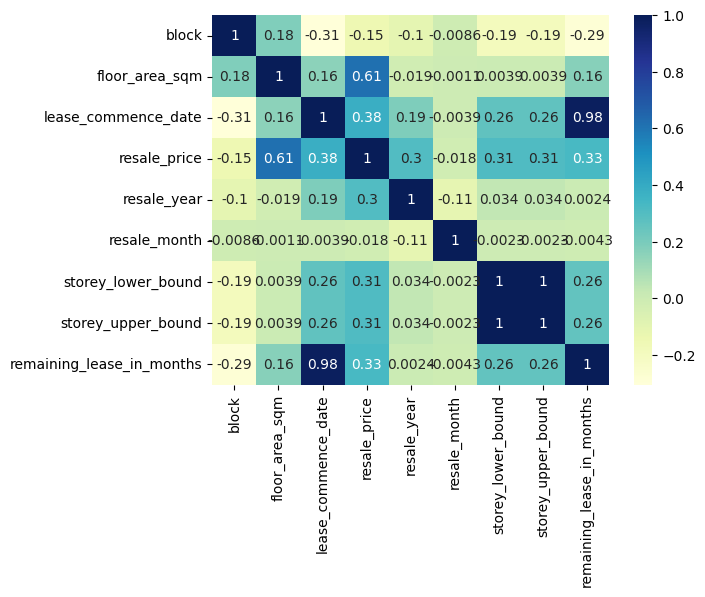

In [29]:
#HEAT MAP
x=df[['block','floor_area_sqm','lease_commence_date','resale_price','resale_year','resale_month','storey_lower_bound','storey_upper_bound','remaining_lease_in_months']].corr()
sns.heatmap(x, annot=True, cmap="YlGnBu")

In [30]:
df.columns

Index(['town', 'flat_type', 'block', 'street_name', 'floor_area_sqm',
       'flat_model', 'lease_commence_date', 'resale_price', 'resale_year',
       'resale_month', 'storey_lower_bound', 'storey_upper_bound',
       'remaining_lease_in_months'],
      dtype='object')

In [31]:
df['town'].value_counts()

town
SENGKANG           16260
WOODLANDS          14350
JURONG WEST        13818
PUNGGOL            13719
TAMPINES           13704
YISHUN             13489
BEDOK              11229
HOUGANG            10252
CHOA CHU KANG       9320
ANG MO KIO          8686
BUKIT BATOK         7751
BUKIT MERAH         7692
BUKIT PANJANG       7464
TOA PAYOH           6255
KALLANG/WHAMPOA     6097
PASIR RIS           6076
SEMBAWANG           5570
QUEENSTOWN          5555
GEYLANG             5064
CLEMENTI            4651
JURONG EAST         4236
SERANGOON           3880
BISHAN              3648
CENTRAL AREA        1735
MARINE PARADE       1249
BUKIT TIMAH          502
Name: count, dtype: int64

In [32]:
df['flat_type'].value_counts()

flat_type
4 ROOM              84584
5 ROOM              49889
3 ROOM              49137
EXECUTIVE           15205
2 ROOM               3291
MULTI-GENERATION       79
1 ROOM                 67
Name: count, dtype: int64

In [33]:
df['flat_model'].value_counts()

flat_model
Model A                   68448
Improved                  50284
New Generation            26883
Premium Apartment         22084
Simplified                 8251
Apartment                  7603
Maisonette                 5773
Standard                   5707
DBSS                       2976
Model A2                   2466
Type S1                     408
Model A-Maisonette          366
Adjoined flat               343
Type S2                     203
Terrace                     117
Premium Apartment Loft       97
2-room                       91
Multi Generation             79
3Gen                         30
Improved-Maisonette          29
Premium Maisonette           14
Name: count, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
X = df[['town','flat_type','block', 'floor_area_sqm','flat_model', 'lease_commence_date', 'resale_year','resale_month', 'storey_lower_bound', 'storey_upper_bound','remaining_lease_in_months']]
y = df['resale_price']


In [36]:
# encoding categorical variables
ohe = LabelEncoder()
X['town']= ohe.fit_transform(X[['town']])

ohe2 = LabelEncoder()
X['flat_type']= ohe2.fit_transform(X[['flat_type']])

ohe3 = LabelEncoder()
X['flat_model']= ohe3.fit_transform(X[['flat_model']])


c:\Users\monis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\monis\AppData\Local\Temp\ipykernel_28536\2852930687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['town']= ohe.fit_transform(X[['town']])
c:\Users\monis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [38]:
#SPLIT TEST AND TRAIN DATA
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [39]:
#INITIALIZE LINEAR REGRESSION
linear_model = LinearRegression(fit_intercept=True) 

#TRAIN THE MODEL WITH TRAIN DATA
linear_model.fit(X_train,y_train)

#PREDICT WITH TEST DATA AND TRAINED MODEL
y_pred = linear_model.predict(X_test)

#CALCULATE MEAN_SQUARED_ERROR AND R2 SCORE
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#PRINT 
print("LINEAR REGRESSION")
print("MSE",mse)
print("R2 SCORE",r2)

LINEAR REGRESSION
MSE 9534540983.97098
R2 SCORE 0.6299861418166588


In [40]:
#INITIALIZE DECISION TREE REGRESSION
dt_regressor = DecisionTreeRegressor(max_depth=20, random_state=11)

#TRAIN THE MODEL WITH TRAIN DATA
dt_regressor.fit(X_train, y_train)

#PREDICT WITH TEST DATA AND TRAINED MODEL
y_pred_dt = dt_regressor.predict(X_test)

#CALCULATE MEAN_SQUARED_ERROR AND R2 SCORE
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

#PRINT 
print("DecisionTreeRegressor")
print("MSE", mse_dt)
print("R2 SCORE", r2_dt)

DecisionTreeRegressor
MSE 1702817521.122663
R2 SCORE 0.9339175234726006


In [41]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [42]:
from sklearn.metrics import mean_absolute_error

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)


print("Mean Squared Error (MSE)     :", mse)
print("R-squared (R2) Score         :", rf_r2)

Mean Squared Error (MSE)     : 917046460.6193174
R-squared (R2) Score         : 0.964411511828668


In [43]:
import pickle

In [44]:
with open("Resale_Flat_Prices.pkl","wb") as f:
  pickle.dump(dt_regressor,f)
with open("town.pkl","wb") as f:
  pickle.dump(ohe,f)
with open("flat_type.pkl","wb") as f:
  pickle.dump(ohe2,f)
with open("flat_model.pkl","wb") as f:
  pickle.dump(ohe3,f)

In [45]:
input=df.head(100).drop('resale_price',axis=1)

In [46]:
input

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_year,resale_month,storey_lower_bound,storey_upper_bound,remaining_lease_in_months
0,ANG MO KIO,3 ROOM,174.0,ANG MO KIO AVE 4,60.0,Improved,1986,2015,1,7,9,840.0
1,ANG MO KIO,3 ROOM,541.0,ANG MO KIO AVE 10,68.0,New Generation,1981,2015,1,1,3,780.0
2,ANG MO KIO,3 ROOM,163.0,ANG MO KIO AVE 4,69.0,New Generation,1980,2015,1,1,3,768.0
3,ANG MO KIO,3 ROOM,446.0,ANG MO KIO AVE 10,68.0,New Generation,1979,2015,1,1,3,756.0
4,ANG MO KIO,3 ROOM,557.0,ANG MO KIO AVE 10,68.0,New Generation,1980,2015,1,7,9,768.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,BEDOK,3 ROOM,401.0,BEDOK NTH AVE 3,67.0,New Generation,1979,2015,1,10,12,756.0
96,BEDOK,3 ROOM,2.0,BEDOK STH AVE 1,65.0,Improved,1976,2015,1,7,9,720.0
97,BEDOK,3 ROOM,2.0,BEDOK STH AVE 1,65.0,Improved,1976,2015,1,10,12,720.0
98,BEDOK,3 ROOM,426.0,BEDOK NTH RD,67.0,New Generation,1979,2015,1,10,12,756.0


In [47]:
input['town']=ohe.fit_transform(input[['town']])
input['flat_type']=ohe2.fit_transform(input[['flat_type']])
input['flat_model']=ohe3.fit_transform(input[['flat_model']])


c:\Users\monis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\monis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\monis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
input.drop('street_name',axis=1,inplace=True)

In [49]:
input

,town,flat_type,block,floor_area_sqm,flat_model,lease_commence_date,resale_year,resale_month,storey_lower_bound,storey_upper_bound,remaining_lease_in_months
0,0,1,174.0,60.0,0,1986,2015,1,7,9,840.0
1,0,1,541.0,68.0,2,1981,2015,1,1,3,780.0
2,0,1,163.0,69.0,2,1980,2015,1,1,3,768.0
3,0,1,446.0,68.0,2,1979,2015,1,1,3,756.0
4,0,1,557.0,68.0,2,1980,2015,1,7,9,768.0
...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,401.0,67.0,2,1979,2015,1,10,12,756.0
96,1,1,2.0,65.0,0,1976,2015,1,7,9,720.0
97,1,1,2.0,65.0,0,1976,2015,1,10,12,720.0
98,1,1,426.0,67.0,2,1979,2015,1,10,12,756.0


In [50]:
df['resale_price'].head(100)

0     255000.0
1     275000.0
2     285000.0
3     290000.0
4     290000.0
        ...   
95    332000.0
96    338000.0
97    339000.0
98    342000.0
99    355000.0
Name: resale_price, Length: 100, dtype: float64

In [51]:
dt_regressor.predict(input)

array([285601.25490196, 290101.6875    , 290101.6875    , 290101.6875    ,
       313882.53956835, 313882.53956835, 331500.        , 290101.6875    ,
       290101.6875    , 313882.53956835, 313882.53956835, 313882.53956835,
       313882.53956835, 313882.53956835, 313882.53956835, 313882.53956835,
       313882.53956835, 313377.6       , 313882.53956835, 313882.53956835,
       313882.53956835, 313882.53956835, 313882.53956835, 313882.53956835,
       353499.04      , 305425.78703704, 313882.53956835, 371111.11111111,
       420000.        , 354516.23529412, 372456.66666667, 388000.        ,
       365000.        , 320000.        , 320000.        , 402900.01834862,
       402900.01834862, 320000.        , 402900.01834862, 320000.        ,
       320000.        , 429627.82178218, 429627.82178218, 320000.        ,
       429627.82178218, 320000.        , 320000.        , 320000.        ,
       320000.        , 513232.14285714, 735000.        , 568285.71428571,
       570000.        , 5